In [35]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LENDO DADOS DE ARQUIVOS .CSV
car = pd.read_csv('auto.csv',sep=';')
clientes = pd.read_csv('clientes.csv',sep=';',encoding='latin-1')
print('Tipo de dado da tabela car:',type(car))
print('Tipo de dado da tabela clientes:',type(clientes))

Tipo de dado da tabela car: <class 'pandas.core.frame.DataFrame'>
Tipo de dado da tabela clientes: <class 'pandas.core.frame.DataFrame'>


In [3]:
#PRIMEIRAS 5 LINHAS DA TABELA CAR
car.head()

,auto_id,auto_brand,auto_model,auto_year,auto_value,id_cliente
0,1993Au16811,Audi,100 2.8 V6,1993,40000.0,28596
1,1994Au13275,Audi,100 2.8 V6 Avant,1994,13873.0,1048
2,1998Pe10697,Peugeot,106 Passion 1.0 3p,1998,7000.0,34309
3,1999Pe13343,Peugeot,106 Passion 1.0 3p,1999,8000.0,14743
4,2000Pe13776,Peugeot,106 Passion 1.0 3p,2000,6000.0,31750


In [4]:
#PRIMEIRAS 5 LINHAS DA TABELA CLIENTES
clientes.head()

,id_client,age,monthly_income,city,state,gender,education_level
0,1001,50,14544,Muriaé,MG,NaN,NaN
1,1002,31,1230,Araxá,MG,male,NaN
2,1003,51,2428,Jaú,SP,male,NaN
3,1004,51,20223,Veranópolis,RS,male,NaN
4,1005,25,19924,São Paulo,SP,male,NaN


In [5]:
#QUANTIDADE DE LINHAS E COLUNAS DAS TABELAS
print('Quantidade de linhas da tabela carro:', car.shape[0])
print('Quantidade de colunas da tabela carro:',  car.shape[1])
print('Quantidade de linhas da tabela clientes:', clientes.shape[0])
print('Quantidade de colunas da tabela clientes:', clientes.shape[1])

Quantidade de linhas da tabela carro: 35029
Quantidade de colunas da tabela carro: 6
Quantidade de linhas da tabela clientes: 35019
Quantidade de colunas da tabela clientes: 7


In [6]:
#RENOMEANDO COLUNA 'ID_CLIENT' PARA 'ID_CLIENTE'
clientes = clientes.rename(columns={'id_client':'id_cliente'})

In [47]:
#JUNTANDO DUAS TABELAS EM APENAS UMA
df = pd.merge(car,clientes,how='inner',on='id_cliente')
df.head()

,auto_id,auto_brand,auto_model,auto_year,auto_value,id_cliente,age,monthly_income,city,state,gender,education_level
0,1993Au16811,Audi,100 2.8 V6,1993,40000.0,28596,50,3760,Alfenas,MG,male,4ª série completa do ensino fundamental (antig...
1,1994Au13275,Audi,100 2.8 V6 Avant,1994,13873.0,1048,36,3500,Cabo Frio,RJ,male,4ª série completa do ensino fundamental (antig...
2,1998Pe10697,Peugeot,106 Passion 1.0 3p,1998,7000.0,34309,39,4000,São Paulo,SP,male,4ª série completa do ensino fundamental (antig...
3,1999Pe13343,Peugeot,106 Passion 1.0 3p,1999,8000.0,14743,25,3000,Paulicéia,SP,female,4ª série completa do ensino fundamental (antig...
4,2000Pe13776,Peugeot,106 Passion 1.0 3p,2000,6000.0,31750,45,3745,Brusque,SC,male,4ª série completa do ensino fundamental (antig...


In [22]:
#INFORMAÇÕES DA TABELA - NOME, QUANTIDADE DE VALOR NÃO NULO E TIPO DE DADO DE CADA COLUNA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35015 entries, 0 to 35014
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   auto_id          35015 non-null  object 
 1   auto_brand       35010 non-null  object 
 2   auto_model       35010 non-null  object 
 3   auto_year        35015 non-null  int64  
 4   auto_value       35015 non-null  float64
 5   id_cliente       35015 non-null  int64  
 6   age              35015 non-null  int64  
 7   monthly_income   35015 non-null  int64  
 8   city             34986 non-null  object 
 9   state            35015 non-null  object 
 10  gender           35015 non-null  object 
 11  education_level  19888 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 3.5+ MB


In [10]:
#ESTATÍSTICAS DOS DADOS NUMÉRICOS
df.describe()

,auto_year,auto_value,id_cliente,age,monthly_income
count,35015.000000,3.501500e+04,35015.000000,35015.00000,35015.000000
mean,2007.310638,2.532786e+04,18518.061774,38.32726,11567.985949
std,5.996748,7.229282e+04,10113.110859,11.57903,6136.653031
min,1985.000000,1.600000e+03,1001.000000,18.00000,700.000000
25%,2004.000000,1.300000e+04,9761.500000,30.00000,6271.000000
50%,2009.000000,2.000000e+04,18518.000000,36.00000,11546.000000
75%,2012.000000,3.000000e+04,27275.500000,46.00000,16871.500000
max,2017.000000,8.000000e+06,36032.000000,116.00000,101200.000000


In [50]:
#CRIANDO CONDIÇÕES PARA VERIFICAR DADOS 
#VERIFICANDO RENDA MENSAL MÁXIMA DE HOMEM E MULHER 
#VERIFICANDO PREÇO MÍNIMO DE VEÍCULOS FABRICADOS DEPOIS DE 2015
print('Maior renda mensal para o sexo feminino:', df[df['gender']=='female'].monthly_income.max())
print('Maior renda mensal para o sexo masculino:', df[df['gender']=='male'].monthly_income.max())

print('\nPreço mínimo de um veículo fabricado depois de 2015:', df[df['auto_year']>2015].auto_value.min())

Maior renda mensal para o sexo feminino: 22143
Maior renda mensal para o sexo masculino: 101200

Preço mínimo de um veículo fabricado depois de 2015: 5900.0


In [12]:
#AGRUPANDO QUANTIDADE DE CLIENTES POR GÊNERO. OBS: É POSSÍVEL NOTAR QUE A SOMA DE CLIENTES DO SEXO MASCULINO E FEMINIMO NÃO
#DÃO O TOTAL DO NÚMERO DE CLIENTES, ISSO SE DEVE POR EXISTIR VALORES NULOS NA COLUNA.
df.groupby('gender')['id_cliente'].count()

gender
female     9791
male      21276
Name: id_cliente, dtype: int64

In [19]:
#VERIFICANDO QUANTIADE DE VALORES NULOS POR COLUNA
df.isnull().sum()

auto_id                0
auto_brand             5
auto_model             5
auto_year              0
auto_value             0
id_cliente             0
age                    0
monthly_income         0
city                  29
state                  0
gender              3948
education_level    15127
dtype: int64

In [20]:
#SUBSTITUINDO VALORES NULOS DA COLUNA GÊNERO POR 'NA'
df['gender'].fillna('NA',inplace=True)
df.isnull().sum()

auto_id                0
auto_brand             5
auto_model             5
auto_year              0
auto_value             0
id_cliente             0
age                    0
monthly_income         0
city                  29
state                  0
gender                 0
education_level    15127
dtype: int64

In [21]:
#VERIFICANDO NOVAMENTE QUANTIDADE DE CLIENTE POR GÊNERO
df.groupby('gender')['id_cliente'].count()

gender
NA         3948
female     9791
male      21276
Name: id_cliente, dtype: int64

In [51]:
#VERIFICANDO TABELA ORDENADA PELO VALOR DOS VEÍCULOS DE MODO DESCRESCENTE
df.sort_values('auto_value',ascending=False).head()

,auto_id,auto_brand,auto_model,auto_year,auto_value,id_cliente,age,monthly_income,city,state,gender,education_level
12019,2000Fo19816,Ford,Fiesta GL 1.0 3p,2000,8000000.0,22616,26,12641,Ribeirão das Neves,MG,NaN,Ensino médio completo (antigo 2º grau
5765,2014Ho27593,Honda,Civic Sedan LXS 1.8/1.8 Flex 16V Aut. 4p,2014,5700000.0,13256,23,21765,Osasco,SP,male,Educação superior incompleta.
22601,1991GM27085,GM - Chevrolet,Monza GL 1.8 EFI/ SL/ L/ 650/Barc. 2e4p,1991,5000000.0,16049,44,16758,Maceió,AL,female,NaN
22801,2014GM18086,GM - Chevrolet,ONIX HATCH LS 1.0 8V FlexPower 5p Mec.,2014,3500000.0,10278,50,6171,São Paulo,SP,female,NaN
3463,2016Fe18212,Ferrari,California 3.9 Turbo F1 V8 560cv,2016,3000000.0,18224,64,19096,Osasco,SP,NaN,Educação superior completa


In [52]:
#VERIFICANDO ALGUMAS COLUNAS DA TABELA COM CONDIÇÕES.
df[df['age']>=30][['id_cliente','age','auto_model','auto_value']].sort_values('age')

,id_cliente,age,auto_model,auto_value
29542,12203,30,Siena Celebration 1.0 Fire Flex 8V 4p,17000.0
3294,12605,30,C4 LOUNGE Origine 2.0 Flex 4p Mec.,50000.0
9643,7552,30,CROSSFOX 1.6 Mi Total Flex 8V 5p,24500.0
27963,22264,30,S10 Pick-Up Luxe 2.2 MPFI / EFI,15000.0
31161,6377,30,SYMBOL Privilège Hi-Flex 1.6 16V 4p,25800.0
...,...,...,...,...
32768,2462,115,Uno Mille WAY ECONOMY 1.0 F.Flex 2p,19000.0
21581,32853,115,LOGAN Expres./Exp. UP Hi-Flex 1.0 16V 4p,21390.0
28923,9347,115,Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V,30000.0
24629,6250,116,Palio EDX 1.0 mpi 2p,6000.0


<AxesSubplot:xlabel='auto_brand', ylabel='count'>

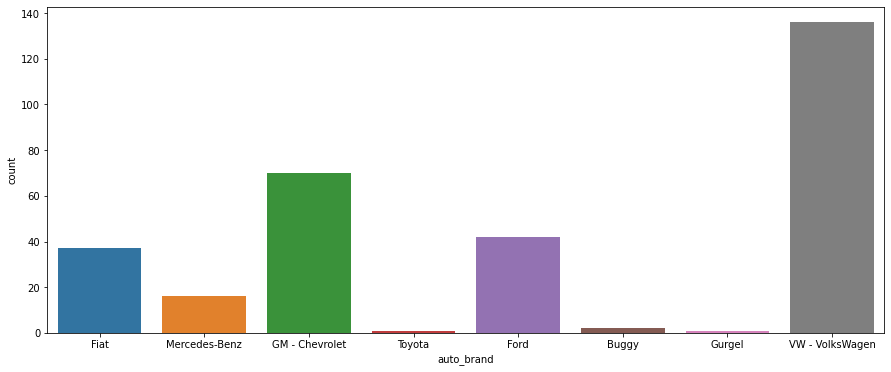

In [46]:
#COM AUXÍLIO DE OUTRAS BIBLIOTECAS, CRIANDO GRÁFICO PARA VERIFICAR QUANTIDADE DE VEÍCULOS POR FABRICANTE
plt.subplots(figsize=(15,6))
sns.countplot(x='auto_brand',data=df[df['auto_year']<1990])